In [2]:
# Build a ping percentile plot

import matplotlib.pyplot as plt
from numpy import percentile
from csv import reader
import math

ROOT="/run/media/haxolotl/Backup/GitRoot/libapollo-rust"

In [3]:
# Plot Tput vs Delta for f=4,8,16,32, w=40

from copy import deepcopy

faults = [4,8,16,32]
w = [10000, 20000, 40000, 80000]

shs_data = {}
apl_data = {}

for f in faults:
    shs_data[f] = {}
    apl_data[f] = {}
    shs_data[f]["x"] = deepcopy(w)
    shs_data[f]["y"] = []
    apl_data[f]["x"] = deepcopy(w)
    apl_data[f]["y"] = []

Protocol="synchs"
for w_val in w:
    for f in faults:
        with open(f"{ROOT}/data/Jan20/c5/vary-d/F{f}/w{w_val}-{f}-{Protocol}-run-cleaned.csv") as in_file:
            csv_reader = reader(in_file)
            for row in csv_reader:
                delta = int(row[0])
                tput = float(row[1])/1000
                lat = float(row[2])
                if delta == 50:
                    shs_data[f]["y"].append(tput)


Protocol="apollo"
for w_val in w:
    for f in faults:
        with open(f"{ROOT}/data/Jan20/c5/vary-d/F{f}/w{w_val}-{f}-{Protocol}-run-cleaned.csv") as in_file:
            csv_reader = reader(in_file)
            for row in csv_reader:
                delta = int(row[0])
                tput = float(row[1])/1000
                lat = float(row[2])
                if delta == 50:
                    apl_data[f]["y"].append(tput)

print(shs_data)



{4: {'x': [10000, 20000, 40000, 80000], 'y': [92.00750540244016, 174.319411564216, 207.40151729891485, 210.14022104292337]}, 8: {'x': [10000, 20000, 40000, 80000], 'y': [90.31772363078633, 141.41242273510017, 143.28893214958018, 132.25008053820375]}, 16: {'x': [10000, 20000, 40000, 80000], 'y': [71.2122446091884, 71.65061589221759, 72.00017227588602, 72.88307842153668]}, 32: {'x': [10000, 20000, 40000, 80000], 'y': [11.594187049016394, 11.640278201053528, 11.688898475376252, 11.82347936489981]}}


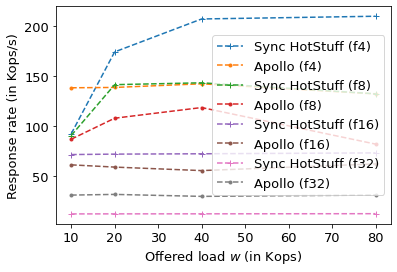

In [4]:
# plt.plot(faults, apl_d500_w40_tput, label="apollo-w40k", linestyle="--", marker=".")
# plt.rcParams["figure.figsize"] =(6.6, 4)
plt.rcParams.update({'font.size': 13})

w = [i/1000 for i in w]

for f in faults:
    plt.plot(w, shs_data[f]["y"], label=f"Sync HotStuff (f{f})", linestyle="--", marker="+")
# for f in faults:
    plt.plot(w, apl_data[f]["y"], label=f"Apollo (f{f})", linestyle="--", marker=".")

plt.legend()
plt.xlabel("Offered load $w$ (in Kops)")
plt.ylabel("Response rate (in Kops/s)")
plt.savefig(f"{ROOT}/Plots/vary-d/t-vs-w.pdf", bbox_inches="tight")

In [5]:
# Plot Tput vs Delta for f=4,8,16,32, w=40

from copy import deepcopy

faults = [4,8,16,32]
w = [10000, 20000, 40000, 80000]

shs_data = {}
apl_data = {}

for f in faults:
    shs_data[f] = {}
    apl_data[f] = {}
    shs_data[f]["x"] = deepcopy(w)
    shs_data[f]["y"] = []
    apl_data[f]["x"] = deepcopy(w)
    apl_data[f]["y"] = []

Protocol="synchs"
for w_val in w:
    for f in faults:
        with open(f"{ROOT}/data/Jan20/c5/vary-d/F{f}/w{w_val}-{f}-{Protocol}-run-cleaned.csv") as in_file:
            csv_reader = reader(in_file)
            for row in csv_reader:
                delta = int(row[0])
                tput = float(row[1])/1000
                lat = float(row[2])
                if delta == 50:
                    shs_data[f]["y"].append(lat)


Protocol="apollo"
for w_val in w:
    for f in faults:
        with open(f"{ROOT}/data/Jan20/c5/vary-d/F{f}/w{w_val}-{f}-{Protocol}-run-cleaned.csv") as in_file:
            csv_reader = reader(in_file)
            for row in csv_reader:
                delta = int(row[0])
                tput = float(row[1])/1000
                lat = float(row[2])
                if delta == 50:
                    apl_data[f]["y"].append(lat)

print(shs_data)



{4: {'x': [10000, 20000, 40000, 80000], 'y': [106.28427429028389, 109.41476009596161, 157.21442323070772, 353.03907836865255]}, 8: {'x': [10000, 20000, 40000, 80000], 'y': [108.69409336265494, 137.55080767692922, 266.8107387045182, 569.9631337465014]}, 16: {'x': [10000, 20000, 40000, 80000], 'y': [138.28531387445022, 274.06404138344664, 540.3124360255898, 1043.282462015194]}, 32: {'x': [10000, 20000, 40000, 80000], 'y': [859.820887644942, 1711.0718512594963, 3396.8628968412636, 6663.3715933626545]}}


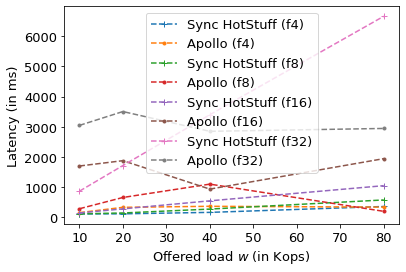

In [6]:
# plt.plot(faults, apl_d500_w40_tput, label="apollo-w40k", linestyle="--", marker=".")
# plt.rcParams["figure.figsize"] =(6.6, 4)
plt.rcParams.update({'font.size': 13})

w = [i/1000 for i in w]

for f in faults:
    plt.plot(w, shs_data[f]["y"], label=f"Sync HotStuff (f{f})", linestyle="--", marker="+")
# for f in faults:
    plt.plot(w, apl_data[f]["y"], label=f"Apollo (f{f})", linestyle="--", marker=".")

plt.legend()
plt.xlabel("Offered load $w$ (in Kops)")
plt.ylabel("Latency (in ms)")
plt.savefig(f"{ROOT}/Plots/vary-d/l-vs-w.pdf", bbox_inches="tight")